In [1]:
import DirectDmTargets as dddm

calculating effective efficancy for Xe detector done
calculating effective efficancy for Ar detector done
calculating effective efficancy for Ge detector done


In [2]:
import wimprates as wr

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import numericalunits as nu

In [5]:
from tqdm import tqdm

In [6]:
from scipy.integrate import quad as scipy_int

# Direct detection of Dark matter using different target materials #

Author:

Joran Angevaare <j.angevaare@nikef.nl>

Date:

14 october 2019 

## Goal ## 

- Roughly reproduce <https://journals.aps.org/prd/abstract/10.1103/PhysRevD.83.083505>
- Update the results thereof with more recent knowledge of the DM-distribution

### Approach ###
To achieve these goals, we must first get a decent recoil spectrum, that is flexible enough to have different astrophysical parameters. Further, it must also be flexible enough to be able to allow for different analytic functions to be added to the model. For instance, we must be able to incorporate the $\rm{SHM}^{++}$ as presented here <https://arxiv.org/abs/1810.11468>.

When we have a sufficiently flexible model, we want to add in the detector physics, we should therein incorporate at least the following parameters:
- target
  - material
  - cross-section
- threshold
- background
- cut efficiency  
- volume
- exposure

Finally we should perform the inference

In [7]:
dddm.detectors['Xe']['res'](1)

0.6

## Detector smearing

## Distribution of the DM ##
First we need to make a DM-rate spectrum

In [8]:
use_SHM = dddm.SHM()

In [9]:
def plot_spectrum(data, color = 'blue', label = 'label'):
    plt.errorbar(data['bin_centers'], data['counts'], 
                xerr=(data['bin_left'] - data['bin_right'])/2,
                yerr = np.sqrt(data['counts']),
                color = color,
                linestyle = 'none',
                capsize = 2,
                marker = 'o',
                label = label
                )

In [22]:
%%time
xe_events = dddm.GenSpectrum(50, 1e-45, use_SHM, dddm.detectors['Xe'])
xe_events.n_bins = 10
xe_galact = xe_events.get_data(poisson = False)
xe_events.n_bins

Wall time: 9.97 ms


10

In [37]:
%%time
xe_events = dddm.DetectorSpectrum(50, 1e-45, use_SHM, dddm.detectors['Xe'])
# xe_events.rebin_factor = 2
xe_det = xe_events.get_data(poisson = False)

Wall time: 661 ms


In [34]:
# def plot_spectrum(data, color = 'blue', label = 'label'):
#     plt.errorbar(data['bin_centers'], data['counts'], 
# #                 xerr=(data['bin_left'] - data['bin_right'])/2,
# #                 yerr = np.sqrt(data['counts']),
#                 color = color,
#                 linestyle = 'none',
#                 capsize = 2,
#                 marker = 'o',
#                 label = label
#                 )

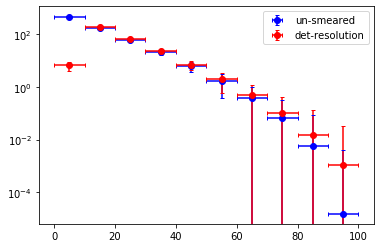

In [35]:
plot_spectrum(xe_galact, label = 'un-smeared')
plot_spectrum(xe_det, 'red', label = 'det-resolution')
plt.yscale("log")
plt.legend()

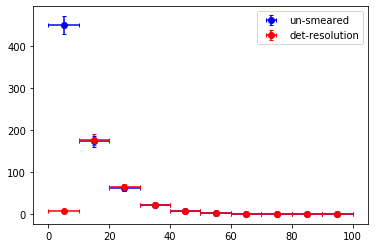

In [36]:
plot_spectrum(xe_galact, label = 'un-smeared')
plot_spectrum(xe_det, 'red', label = 'det-resolution')
plt.legend()

In [38]:
import time

In [79]:
# results

In [94]:
factors = np.array([4,8,10,25,50,100,1000,10000])
results = {}
for factor in tqdm(factors):
    start = time.time()
    xe_ev = dddm.DetectorSpectrum(50, 1e-45, use_SHM, dddm.detectors['Xe'])
    xe_ev.rebin_factor = factor
    xe_res = xe_ev.get_data(poisson = False)
    end = time.time()
    
    results[factor] = {'time':end-start, "data":xe_res}
    

100%|█████████████████████████████████████████████████████████████████████████████████| 8/8 [08:30<00:00, 63.76s/it]


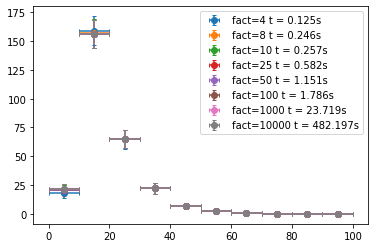

In [95]:
def plot_results(data, label = 'label'):
    plt.errorbar(data['bin_centers'], data['counts'], 
                xerr=(data['bin_left'] - data['bin_right'])/2,
                yerr = np.sqrt(data['counts']),
                linestyle = 'none',
                capsize = 2,
                marker = 'o',
                label = label
                )
for res in results.keys():
    plot_results(results[res]['data'], f"fact={res} t = %.3fs"%results[res]['time'])
plt.legend()

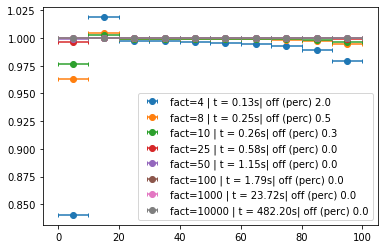

In [96]:
def plot_results_compare(data, data2, label = 'label'):
    off_percent = 100 - 100 * np.mean(np.abs(data['counts']/data2['counts']))
    plt.errorbar(data['bin_centers'], data['counts']/data2['counts'], 
                xerr=(data['bin_left'] - data['bin_right'])/2,
#                 yerr = np.sqrt(data['counts'])/data2['counts'],
                linestyle = 'none',
                capsize = 2,
                marker = 'o',
                label = label + "| off (perc) %.1f"%off_percent
                )
    
for res in results.keys():
    plot_results_compare(results[res]['data'], 
                         results[np.max(factors)]['data'], 
                         f"fact={res} | t = %.2fs"%results[res]['time'])
plt.legend()

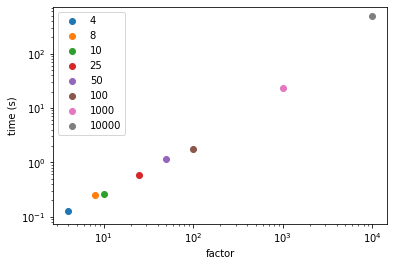

In [97]:
for x in results.keys():
    plt.scatter(x, results[x]['time'], label = x)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("time (s)")
plt.xlabel("factor")
plt.legend()